In [17]:
from PIL import Image, ImageDraw

# Create a new image with a uniform light gray background
width, height = 400, 300
background_color = (50, 50, 50) 
image = Image.new('RGB', (width, height), background_color)
draw = ImageDraw.Draw(image)

# Draw two black disks
disk_radius = 15
disk_color = (200, 200, 200)  
for x in range (100,300,35):
    for y in range(50,250,35):
        draw.ellipse((x - disk_radius, y - disk_radius,
              x + disk_radius, y + disk_radius), fill=disk_color)


# Draw a red horizontal line passing through the disks
line_color = (255, 0, 0)  # Red
line_y = 120
draw.line((0, line_y, width, line_y), fill=line_color)

# Save the image
image.save('output_image2.png')
image.show()

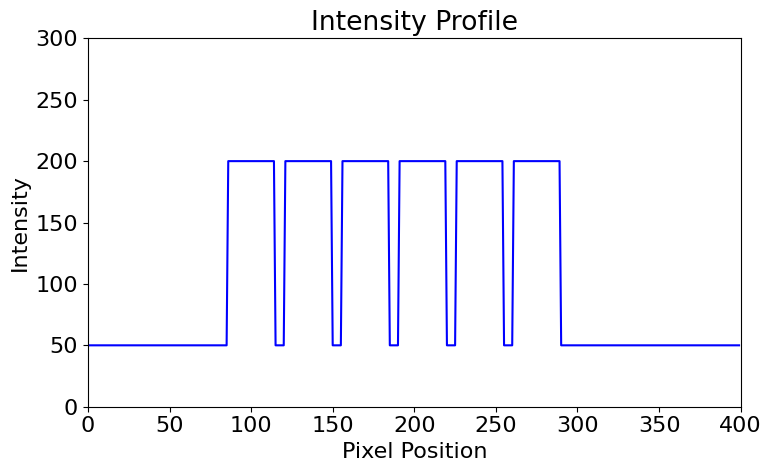

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new grayscale image with a uniform light gray background
width, height = 400, 300
background_color = 50  # Light gray
image = Image.new('L', (width, height), background_color)
draw = ImageDraw.Draw(image)

# Draw two black disks
disk_radius = 15
disk_color = 200
for x in range (100,300,35):
    for y in range(50,250,35):
        draw.ellipse((x - disk_radius, y - disk_radius,
              x + disk_radius, y + disk_radius), fill=disk_color)

# Draw a red horizontal line passing through the disks
# line_y = height // 2
# draw.line((0, line_y, width, line_y), fill=255)  # White

image.save("square_disks_2.png")
# Get the intensity profile row
region_pixels = np.array(image)
middle_row = height // 2
intensity_profile = region_pixels[middle_row]

# Plot the intensity profile
plt.figure(figsize=(8, 5))
plt.plot(intensity_profile, color='blue')
plt.title("Intensity Profile")
plt.xlabel("Pixel Position")
plt.ylabel("Intensity")
plt.xlim(0, 400)
plt.ylim(0, 300)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()


In [20]:
from skimage.util import random_noise
noisy_gaussian = random_noise(region_pixels, mode="gaussian", var=0.1)
noisy = (random_noise(noisy_gaussian, mode='poisson')*255).astype(np.uint8)
print(noisy)


[[255  85   0 ...  64  84  33]
 [  0 143   0 ... 165  17   0]
 [127  57 156 ...  17  45  66]
 ...
 [ 65  98   0 ... 112  25   0]
 [100 119   0 ...  55  11 112]
 [ 13   0  12 ...  23 113 161]]


In [21]:
noisy_image = Image.fromarray(noisy)
noisy_image.show()

In [28]:
from filters import gaussian_filtering
image_gaussian = gaussian_filtering(noisy, 10)
image_gaussian_noisy = (random_noise(image_gaussian, mode="gaussian", var=0.01)*255).astype(np.uint8)

In [29]:
pil_gaussian = Image.fromarray(image_gaussian_noisy)
pil_gaussian.show()
pil_gaussian.save('output_image_gaussian2.png')

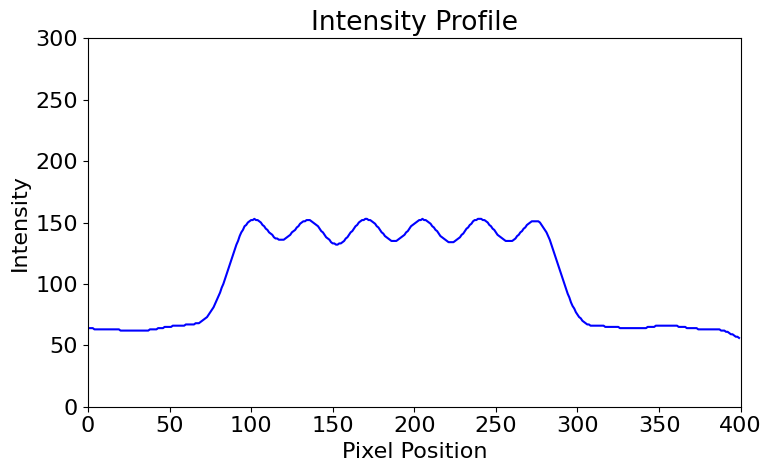

In [30]:

intensity_profile = image_gaussian[middle_row]

# Plot the intensity profile
plt.figure(figsize=(8, 5))
plt.plot(intensity_profile, color='blue')
plt.title("Intensity Profile")
plt.xlabel("Pixel Position")
plt.ylabel("Intensity")
plt.xlim(0, 400)
plt.ylim(0, 300)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

In [31]:
def apply_downsample(image, factor=5):
    from scipy.ndimage import zoom
    downsampled_image = image[::factor, ::factor]

    # Display the original and downsampled images
    plt.figure(figsize=(10, 5))


    plt.imshow(downsampled_image, cmap='gray')
    plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

    return zoom(downsampled_image, factor, order=0)

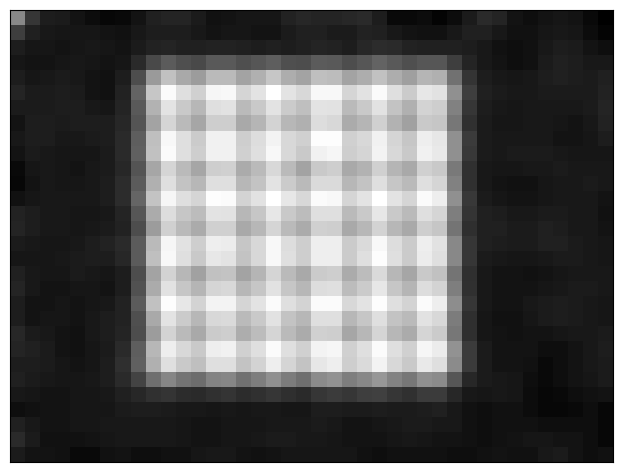

In [32]:
downsampled_image = apply_downsample(image_gaussian, 10)

In [33]:
pil_resampled = Image.fromarray(downsampled_image)
pil_resampled.save("output_image_resampled.png")

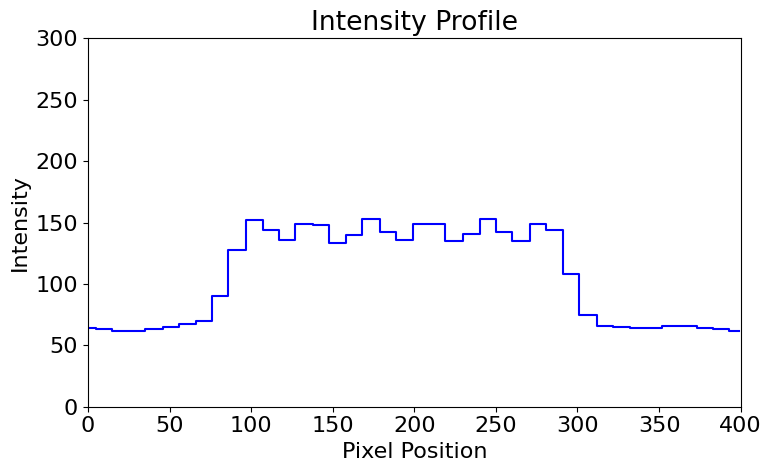

In [35]:
intensity_profile = downsampled_image[150]

# Plot the intensity profile
plt.figure(figsize=(8, 5))
plt.step(np.arange(len(intensity_profile)), intensity_profile, color='blue')
plt.title("Intensity Profile")
plt.xlabel("Pixel Position")
plt.ylabel("Intensity")
plt.xlim(0, 400)
plt.ylim(0, 300)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()